# Laptop Price Prediction

Dataset: Laptop Price Personal Datasets (Ref: https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset)

Features:
> brand: The brand of the laptop (e.g., ASUS, MSI, Dell, HP, Lenovo, etc.) <br>
> model: The specific model or series of the laptop <br>
> processor: The type and specifications of the processor (e.g., Intel i5, Ryzen 7) <br>
> ram: The amount of RAM (in GB) <br>
> storage: The type and capacity of storage (e.g., 512GB SSD, 1TB HDD) <br>
> gpu: The graphics processing unit (GPU) details if available <br>
> os: The operating system (e.g., Windows, MacOS, Linux) <br>
> warranty: The warranty period for the laptop (e.g., 1 year, 2 years) <br>
> display: Indicates whether the laptop has a touchscreen feature (Yes/No) <br>
> weight: The weight of the laptop (Casual , ThinNlight , Gaming) <br>
> price: The price of the laptop <br>

### Data Loading

In [137]:
# installing the necessary libaries

!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
# Load the necessary libararies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

 # Importing the dataset

In [139]:
# Load data as a pandas dataframe

df = pd.read_csv('https://raw.githubusercontent.com/DilukshanA/Laptop-Price-Predictor/refs/heads/main/laptopPrice.csv')

In [140]:
df.head(10)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


### Data Preprocessing and EDA

In [141]:
# Print the shape of the dataframe
#number_of_rows, number_of_columns

df.shape

(823, 19)

In [142]:
# Print a concise summary of the pandas dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [143]:
# Rename specific columns in the DataFrame for better readability

df.rename(columns = {'processor_gnrtn':'Generation', 'ram_gb':'RAM'}, inplace = True)

### Data Visualization

In [144]:
# Select only numeric columns (float and int) from the DataFrame

numeric_df = df.select_dtypes(include=[float, int])

# Convert the 'Price' column to numeric, coercing errors to NaN if conversion fails

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate the correlation of numeric columns with 'Price'

correlation = numeric_df.corr()['Price']

print(correlation)

Price                1.000000
Number of Ratings   -0.140392
Number of Reviews   -0.148738
Name: Price, dtype: float64


In [145]:
# Count the number of occurrences of each brand in the 'brand' column

df.brand.value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6816\3002399124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'brand', y = 'Price', palette = 'magma')


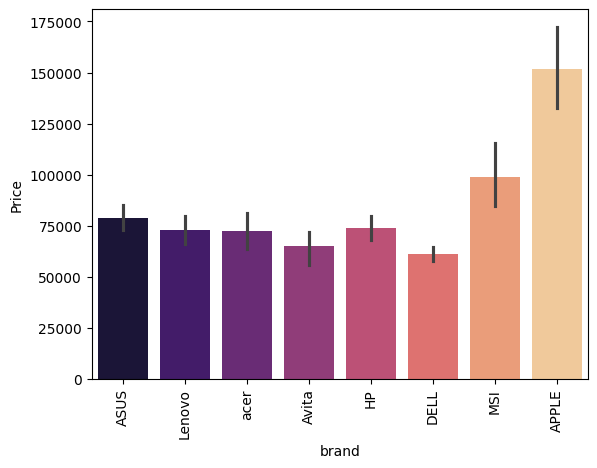

In [146]:
# Create a bar plot showing the average price for each brand

sns.barplot(data = df, x = 'brand', y = 'Price', palette = 'magma')

# Rotate the x-axis labels vertically for better visibility

plt.xticks(rotation = 'vertical')

# Display the plot

plt.show()

In [147]:
# Count the number of occurrences of each processor brand in the 'processor_brand' column

df.processor_brand.value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

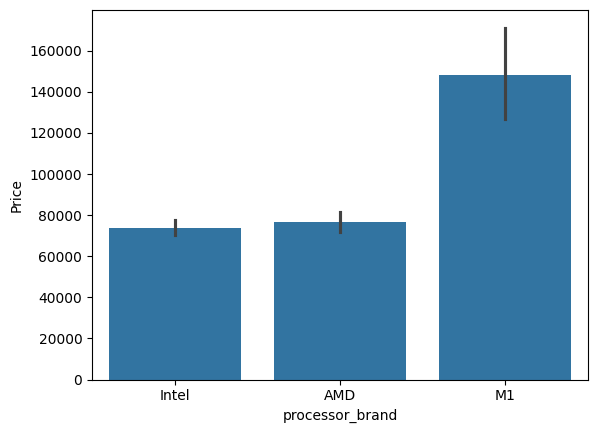

In [148]:
sns.barplot(data = df, x = 'processor_brand', y = 'Price')
plt.show()

In [149]:
df.processor_name.value_counts()

processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

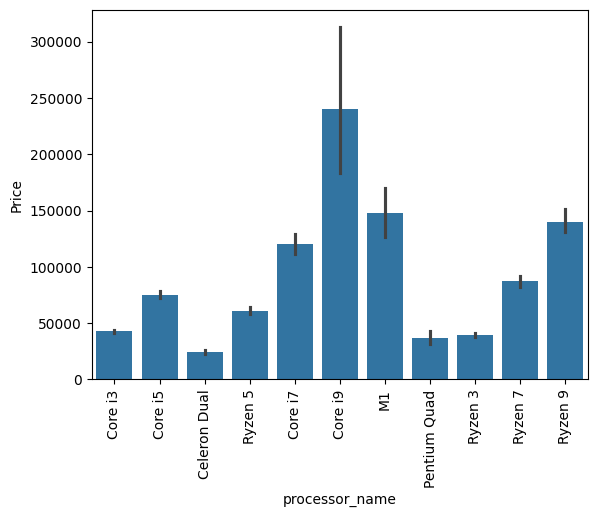

In [150]:
sns.barplot(data = df, x = 'processor_name', y = 'Price')
plt.xticks(rotation ='vertical')
plt.show()

In [151]:
df.Generation.value_counts()

Generation
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6816\2509183977.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Generation', y = 'Price', palette = 'husl')


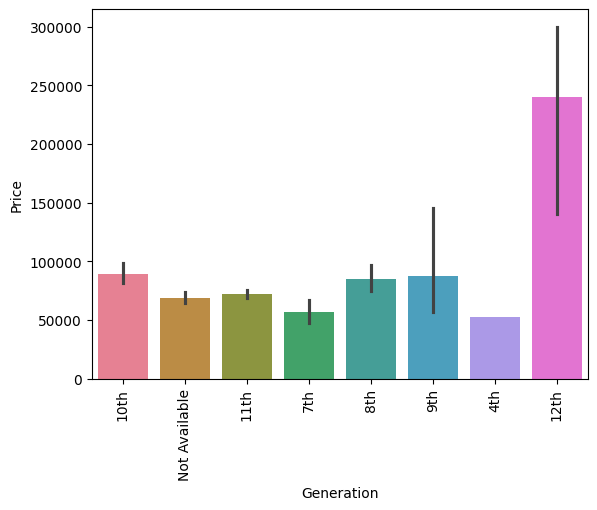

In [152]:
sns.barplot(data = df, x = 'Generation', y = 'Price', palette = 'husl')
plt.xticks(rotation = 'vertical')
plt.show()

Prices aren't really varying with generation and there are a lot of missing values as well; so I am getting rid of this column.

In [153]:
df.drop('Generation', axis= 1, inplace = True)

In [154]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'RAM', 'ram_type', 'ssd',
       'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty',
       'Touchscreen', 'msoffice', 'Price', 'rating', 'Number of Ratings',
       'Number of Reviews'],
      dtype='object')

In [155]:
df.RAM.value_counts()

RAM
8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: count, dtype: int64

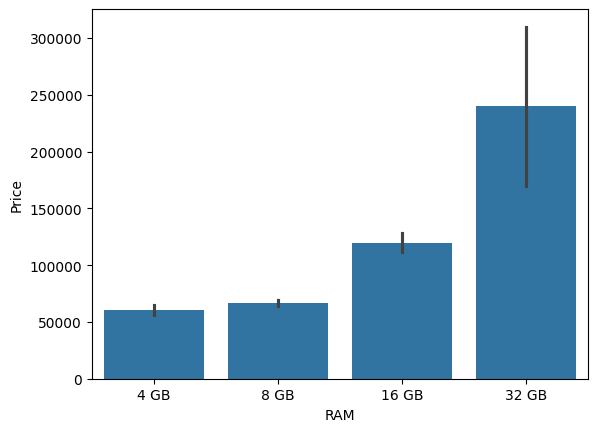

In [156]:
sns.barplot(data = df, x = 'RAM', y = 'Price')
plt.show()

In [157]:
df['RAM'] = df.RAM.str.replace(' GB', '')
df['RAM'] = df.RAM.astype(int)

In [158]:
df.ram_type.value_counts()

ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

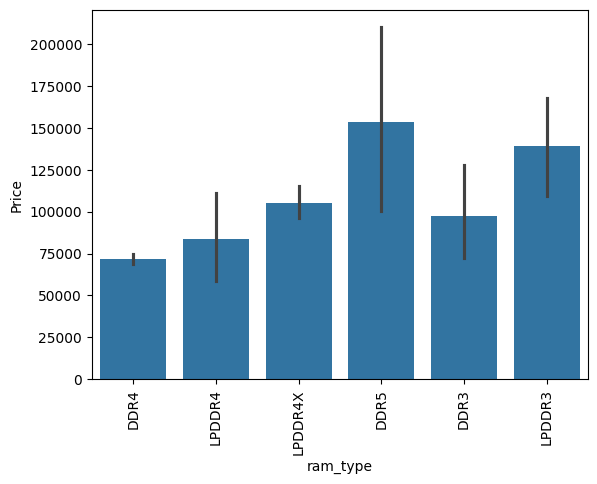

In [159]:
sns.barplot(data = df, x = 'ram_type', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

In [160]:
df.ssd.value_counts()

ssd
512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6816\4166130536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'ssd', y = 'Price', palette = 'hls')


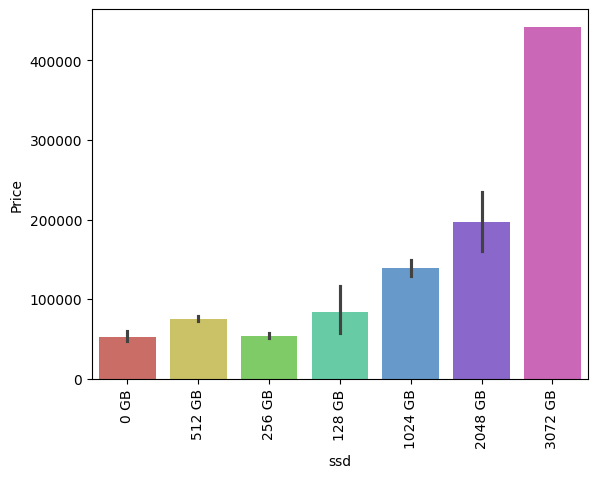

In [161]:
sns.barplot(data = df, x = 'ssd', y = 'Price', palette = 'hls')
plt.xticks(rotation = 'vertical')
plt.show()

In [162]:
df['ssd'] = df.ssd.str.replace(' GB', '')

In [163]:
df['ssd'] = df.ssd.astype(int)

In [164]:
df.hdd.value_counts()

hdd
0 GB       621
1024 GB    160
512 GB      41
2048 GB      1
Name: count, dtype: int64

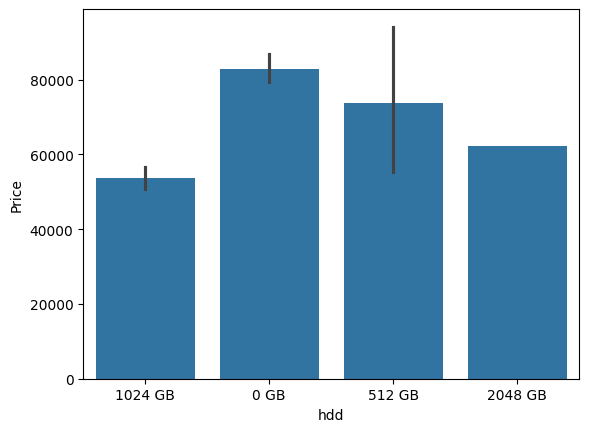

In [165]:
sns.barplot(data = df, x = 'hdd', y = 'Price')
plt.show()

hdd will be changed to a boolean column with values 0 and 1. A laptop either has hdd or not.

In [166]:
df['hdd'] = df['hdd'].apply(lambda x:0 if (x == '0 GB') else 1)

In [167]:
df['hdd'].value_counts()

hdd
0    621
1    202
Name: count, dtype: int64

In [168]:
df.os.value_counts()

os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64

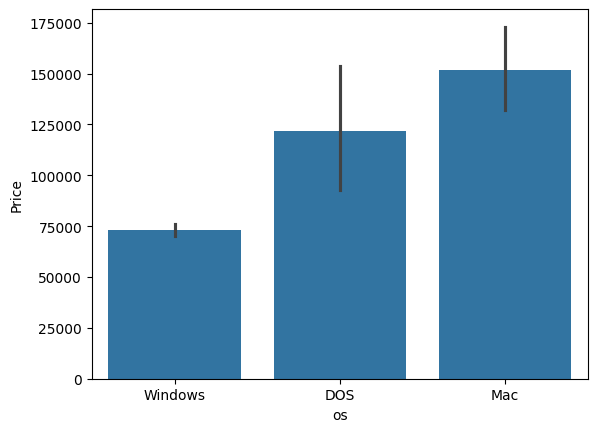

In [169]:
sns.barplot(data =df, x = 'os', y = 'Price')
plt.show()

In [170]:
df.os_bit.value_counts()

os_bit
64-bit    714
32-bit    109
Name: count, dtype: int64

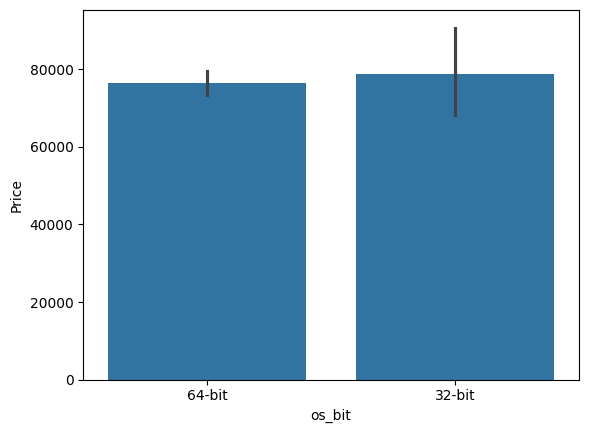

In [171]:
sns.barplot(data =df, x = 'os_bit', y = 'Price')
plt.show()

os_bit doesn't depend on price at all.
So I am removing this.

In [172]:
df.drop('os_bit', axis = 1, inplace = True)

In [173]:
df.graphic_card_gb.value_counts()

graphic_card_gb
0 GB    577
4 GB    128
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6816\3176998563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =df, x = 'graphic_card_gb', y = 'Price', palette = 'viridis')


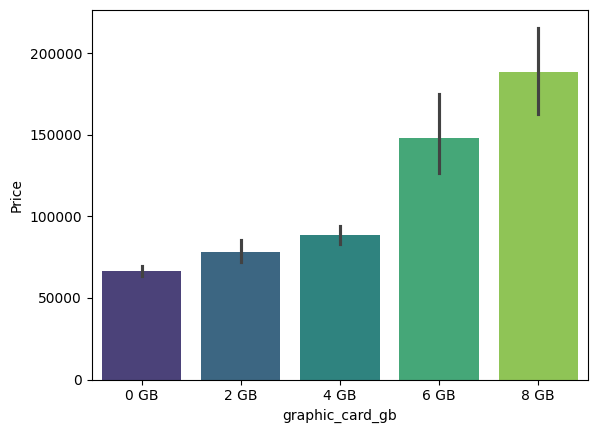

In [174]:
sns.barplot(data =df, x = 'graphic_card_gb', y = 'Price', palette = 'viridis')
plt.show()

In [175]:
df.graphic_card_gb = df.graphic_card_gb.str.replace(' GB', '')
df.graphic_card_gb = df.graphic_card_gb.astype(int)

In [176]:
df.weight.value_counts()

weight
Casual        520
ThinNlight    264
Gaming         39
Name: count, dtype: int64

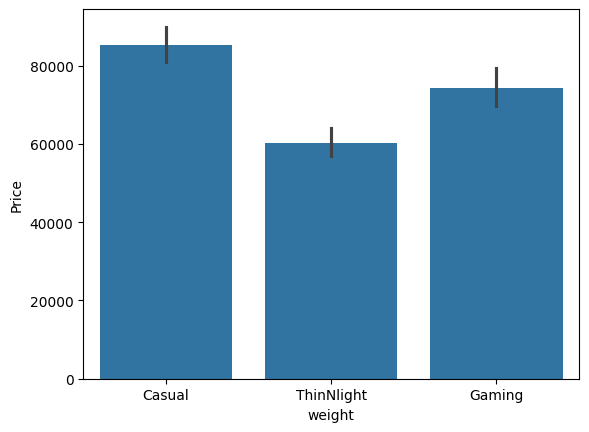

In [177]:
sns.barplot(data = df, x = 'weight', y = 'Price')
plt.show()

In [178]:
df.warranty.value_counts()

warranty
1 year         509
No warranty    278
2 years         23
3 years         13
Name: count, dtype: int64

In [179]:
def fetch_warranty(text):
    if text == '1 year':
        return 1
    elif text == '2 years':
        return 2
    elif text == '3 years':
        return 3
    else:
        return 0

In [180]:
df['warranty'] = df['warranty'].apply(fetch_warranty)

In [181]:
df.warranty.dtype

dtype('int64')

In [182]:
df.Touchscreen.value_counts()

Touchscreen
No     726
Yes     97
Name: count, dtype: int64

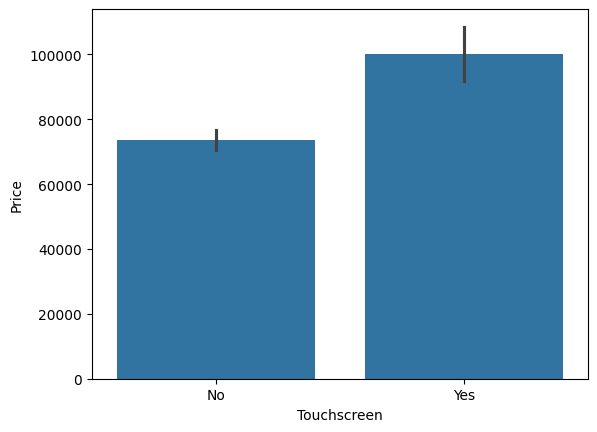

In [183]:
sns.barplot(data =df, x = 'Touchscreen', y = 'Price')
plt.show()

In [184]:
df.msoffice.value_counts()

msoffice
No     542
Yes    281
Name: count, dtype: int64

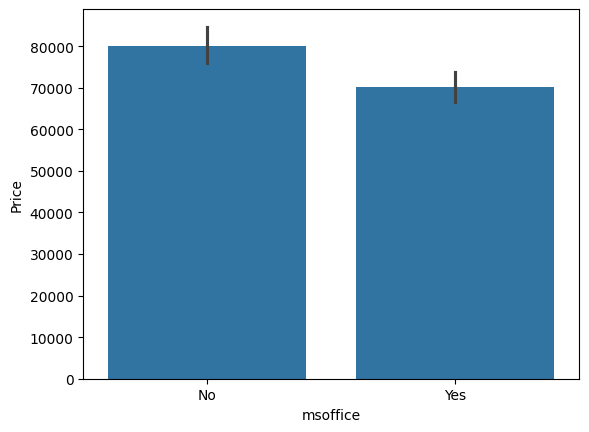

In [185]:
sns.barplot(data =df, x = 'msoffice', y = 'Price')
plt.show()

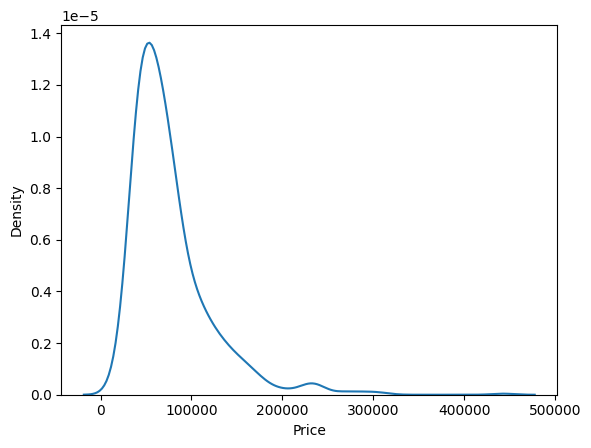

In [186]:
sns.kdeplot(df['Price'])
plt.show()

In [187]:
df['Price'].skew()

np.float64(2.388557273333574)

Price is skewed towards the right, so I am applying log transformation

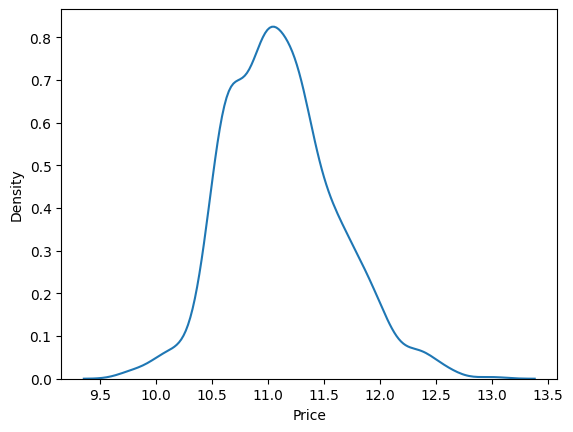

In [188]:
sns.kdeplot(np.log(df['Price']))
plt.show()

In [189]:
np.log(df['Price']).skew()

np.float64(0.428209965451765)

In [190]:
#log tranformation of the price
df['Price'] = np.log(df['Price'])

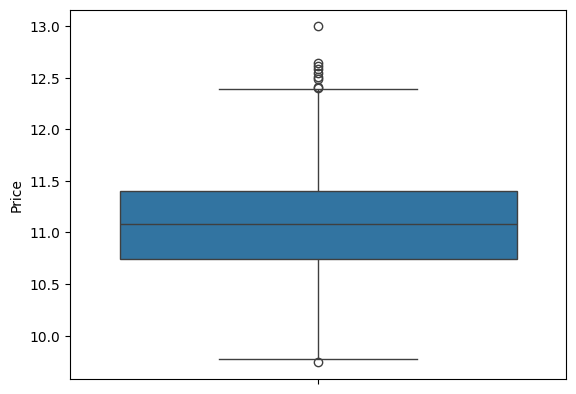

In [191]:
sns.boxplot(df['Price'])
plt.show()

In [192]:
df['rating'].value_counts()

rating
4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

In [193]:
df[df['rating'] == '1 star']

,brand,processor_brand,processor_name,RAM,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
200,DELL,Intel,Core i5,8,LPDDR4,0,1,DOS,4,Casual,1,No,No,11.128586,1 star,23,4
509,DELL,Intel,Core i7,16,DDR3,512,0,Windows,0,ThinNlight,1,No,Yes,11.710874,1 star,3,0


In [194]:
def fetch_rating(input):
    if input == '1 star':
        return 1
    elif input == '2 stars':
        return 2
    elif input == '3 stars':
        return 3
    elif input == '4 stars':
        return 4
    else:
        return 5

In [195]:
df['rating'] = df['rating'].apply(fetch_rating)

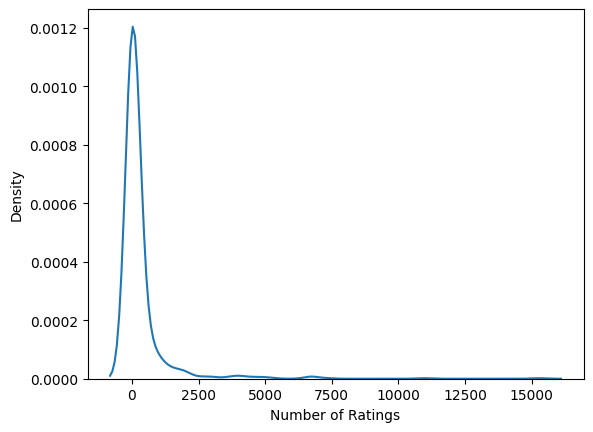

In [196]:
sns.kdeplot(df['Number of Ratings'])
plt.show()

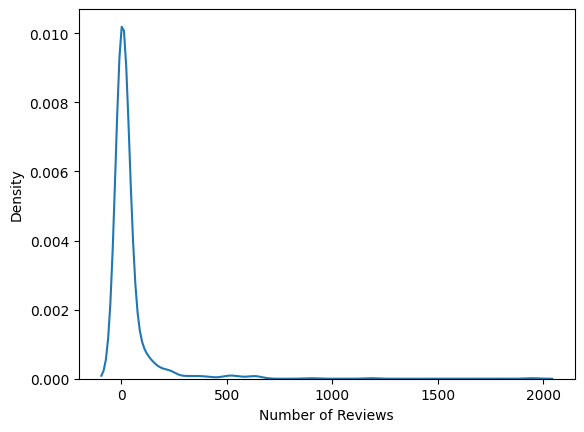

In [197]:
sns.kdeplot(df['Number of Reviews'])
plt.show()

In [198]:
df.describe()

,RAM,ssd,hdd,graphic_card_gb,warranty,Price,rating,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,8.680437,452.121507,0.245443,1.190765,0.721750,11.118157,3.562576,315.301337,37.609964
std,4.372408,316.662592,0.430612,2.026902,0.593231,0.492275,0.567282,1047.382654,121.728017
min,4.000000,0.000000,0.000000,0.000000,0.000000,9.740380,1.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,0.000000,0.000000,10.738457,3.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,0.000000,1.000000,11.081989,4.000000,17.000000,2.000000
75%,8.000000,512.000000,0.000000,2.000000,1.000000,11.403512,4.000000,139.500000,18.000000
max,32.000000,3072.000000,1.000000,8.000000,3.000000,12.999043,5.000000,15279.000000,1947.000000


In [199]:
df_num = df.loc[:, ['RAM', 'hdd', 'graphic_card_gb', 'warranty', 'Price', 'rating', 'Number of Ratings', 'Number of Reviews']]

In [200]:
df_num.corr()

,RAM,hdd,graphic_card_gb,warranty,Price,rating,Number of Ratings,Number of Reviews
RAM,1.000000,-0.199945,0.278544,0.069329,0.550103,0.018126,-0.113348,-0.116811
hdd,-0.199945,1.000000,-0.034197,-0.179985,-0.317179,-0.087852,0.118851,0.131542
graphic_card_gb,0.278544,-0.034197,1.000000,-0.035730,0.483179,0.040920,-0.027118,-0.021457
warranty,0.069329,-0.179985,-0.035730,1.000000,0.112034,0.172904,0.066519,0.062176
Price,0.550103,-0.317179,0.483179,0.112034,1.000000,-0.028120,-0.177825,-0.192853
rating,0.018126,-0.087852,0.040920,0.172904,-0.028120,1.000000,0.155281,0.152241
Number of Ratings,-0.113348,0.118851,-0.027118,0.066519,-0.177825,0.155281,1.000000,0.989626
Number of Reviews,-0.116811,0.131542,-0.021457,0.062176,-0.192853,0.152241,0.989626,1.000000


The last 2 columns are highly skewed and more than half of the values are 0. They are highly correlated to each other. Anyway reviews don't affect the prices of laptops in practical applications.

Rating has a negligible correlation with Price. So these 3 columns will be eremoved.

In [201]:
df.drop(columns = ['rating', 'Number of Reviews', 'Number of Ratings'], inplace = True)

In [202]:
df

,brand,processor_brand,processor_name,RAM,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.453024
1,Lenovo,Intel,Core i3,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.571291
2,Lenovo,Intel,Core i3,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.596610
3,ASUS,Intel,Core i5,8,DDR4,512,0,Windows,2,Casual,0,No,No,11.156108
4,ASUS,Intel,Celeron Dual,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.203222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,4,DDR4,1024,0,Windows,0,Casual,1,No,No,11.820337
819,ASUS,AMD,Ryzen 9,4,DDR4,1024,0,Windows,0,Casual,1,No,No,11.884420
820,ASUS,AMD,Ryzen 9,4,DDR4,1024,0,Windows,4,Casual,1,No,No,11.918324
821,ASUS,AMD,Ryzen 9,4,DDR4,1024,0,Windows,4,Casual,1,No,No,11.870530


In [203]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.26, random_state = 4)

In [205]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [206]:
trans = ColumnTransformer(transformers = [
    ('ohe', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 2, 4, 7, 9, 11, 12])
], remainder = 'passthrough')

In [207]:
pipe = Pipeline([
    ('transformation', trans)
])

In [208]:
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [209]:
X_train = pd.DataFrame(X_train_transformed, columns=pipe.named_steps['transformation'].get_feature_names_out())
X_test = pd.DataFrame(X_test_transformed, columns=pipe.named_steps['transformation'].get_feature_names_out())

In [210]:
X_train

,ohe__brand_ASUS,ohe__brand_Avita,ohe__brand_DELL,ohe__brand_HP,ohe__brand_Lenovo,ohe__brand_MSI,ohe__brand_acer,ohe__processor_brand_Intel,ohe__processor_brand_M1,ohe__processor_name_Core i3,...,ohe__os_Windows,ohe__weight_Gaming,ohe__weight_ThinNlight,ohe__Touchscreen_Yes,ohe__msoffice_Yes,remainder__RAM,remainder__ssd,remainder__hdd,remainder__graphic_card_gb,remainder__warranty
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,16.0,512.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,8.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,8.0,512.0,0.0,2.0,3.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,4.0,512.0,0.0,0.0,3.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.0,512.0,0.0,2.0,0.0
605,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,512.0,0.0,4.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,2.0,1.0
607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,8.0,256.0,1.0,0.0,1.0


## Model building

In [211]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [212]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.8495148475713474
RandomForestRegressor() --> 0.8571054302261008


In [213]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_
best_model

RandomForestRegressor(n_estimators=50)

In [214]:
best_model.score(X_test, y_test)

0.8583230018868255

In [215]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [216]:
X_test.columns

Index(['ohe__brand_ASUS', 'ohe__brand_Avita', 'ohe__brand_DELL',
       'ohe__brand_HP', 'ohe__brand_Lenovo', 'ohe__brand_MSI',
       'ohe__brand_acer', 'ohe__processor_brand_Intel',
       'ohe__processor_brand_M1', 'ohe__processor_name_Core i3',
       'ohe__processor_name_Core i5', 'ohe__processor_name_Core i7',
       'ohe__processor_name_Core i9', 'ohe__processor_name_M1',
       'ohe__processor_name_Pentium Quad', 'ohe__processor_name_Ryzen 3',
       'ohe__processor_name_Ryzen 5', 'ohe__processor_name_Ryzen 7',
       'ohe__processor_name_Ryzen 9', 'ohe__ram_type_DDR4',
       'ohe__ram_type_DDR5', 'ohe__ram_type_LPDDR3', 'ohe__ram_type_LPDDR4',
       'ohe__ram_type_LPDDR4X', 'ohe__os_Mac', 'ohe__os_Windows',
       'ohe__weight_Gaming', 'ohe__weight_ThinNlight', 'ohe__Touchscreen_Yes',
       'ohe__msoffice_Yes', 'remainder__RAM', 'remainder__ssd',
       'remainder__hdd', 'remainder__graphic_card_gb', 'remainder__warranty'],
      dtype='object')

In [217]:
num_columns = X_test.shape[1]
print("Number of columns:", num_columns)

Number of columns: 35


In [218]:
pred_value = best_model.predict([[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]])
pred_value

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.41482524])

In [219]:
pred_value = best_model.predict([[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]])
pred_value

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.41482524])

In [220]:
df.head()

,brand,processor_brand,processor_name,RAM,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.453024
1,Lenovo,Intel,Core i3,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.571291
2,Lenovo,Intel,Core i3,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.596610
3,ASUS,Intel,Core i5,8,DDR4,512,0,Windows,2,Casual,0,No,No,11.156108
4,ASUS,Intel,Celeron Dual,4,DDR4,0,1,Windows,0,Casual,0,No,No,10.203222


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            823 non-null    object 
 1   processor_brand  823 non-null    object 
 2   processor_name   823 non-null    object 
 3   RAM              823 non-null    int64  
 4   ram_type         823 non-null    object 
 5   ssd              823 non-null    int64  
 6   hdd              823 non-null    int64  
 7   os               823 non-null    object 
 8   graphic_card_gb  823 non-null    int64  
 9   weight           823 non-null    object 
 10  warranty         823 non-null    int64  
 11  Touchscreen      823 non-null    object 
 12  msoffice         823 non-null    object 
 13  Price            823 non-null    float64
dtypes: float64(1), int64(5), object(8)
memory usage: 90.1+ KB


In [243]:
pred_value = best_model.predict([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 8, 512, 0, 2, 2]])

# Print the predicted log value
print("Predicted log value (ln):", pred_value)

# Convert to the original value (antilog using natural logarithm)
original_value = np.exp(pred_value)

# Print the original value indian Rupees
print("Original value:","IR ", original_value)

# Print the original value Sri Lankan Rupees
print("Original value:","LKR ", original_value*3.44)

Predicted log value (ln): [10.76331652]
Original value: IR  [47255.13123096]
Original value: LKR  [162557.65143449]


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [246]:
X_train.columns

Index(['ohe__brand_ASUS', 'ohe__brand_Avita', 'ohe__brand_DELL',
       'ohe__brand_HP', 'ohe__brand_Lenovo', 'ohe__brand_MSI',
       'ohe__brand_acer', 'ohe__processor_brand_Intel',
       'ohe__processor_brand_M1', 'ohe__processor_name_Core i3',
       'ohe__processor_name_Core i5', 'ohe__processor_name_Core i7',
       'ohe__processor_name_Core i9', 'ohe__processor_name_M1',
       'ohe__processor_name_Pentium Quad', 'ohe__processor_name_Ryzen 3',
       'ohe__processor_name_Ryzen 5', 'ohe__processor_name_Ryzen 7',
       'ohe__processor_name_Ryzen 9', 'ohe__ram_type_DDR4',
       'ohe__ram_type_DDR5', 'ohe__ram_type_LPDDR3', 'ohe__ram_type_LPDDR4',
       'ohe__ram_type_LPDDR4X', 'ohe__os_Mac', 'ohe__os_Windows',
       'ohe__weight_Gaming', 'ohe__weight_ThinNlight', 'ohe__Touchscreen_Yes',
       'ohe__msoffice_Yes', 'remainder__RAM', 'remainder__ssd',
       'remainder__hdd', 'remainder__graphic_card_gb', 'remainder__warranty'],
      dtype='object')

In [250]:
import pickle
with open('laptop_price_predictor.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Model saved as laptop_price_predictor.pkl")


Model saved as laptop_price_predictor.pkl
